# Pokemon Lab
### In this Lab we are going to work with a pokemon dataset and we will explore the data in order to create a prediction model for battle outcome. This prediction model is based on the pokemon from 1st to 6th Gen with a total of 697 pokemon.

# 1st Phase
### Make an Exploratory Data Analysis of the pokemon data set

In [4]:
#Let's import all the necessary libraries for this EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# We need to load our CSV file which is locally available in our computer. We need to load it into our Data frame in order to work with it
df_pokemon = pd.read_csv(r'C:\Users\Edo\Documents\data_science-portfolio\Project1\data\final_pokemon.csv') # To load the data, change the path to correspond the file path in your device
df_pokemon.head()

#        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  1   Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1  2     Ivysaur  Grass  Poison  60      62       63       80       80     60   
2  3    Venusaur  Grass  Poison  80      82       83      100      100     80   
3  5  Charmander   Fire  Normal  39      52       43       60       50     65   
4  6  Charmeleon   Fire  Normal  58      64       58       80       65     80   

   Generation  Legendary  height  weight  base_experience  \
0           1      False       7      69               64   
1           1      False      10     130              142   
2           1      False      20    1000              236   
3           1      False       6      85               62   
4           1      False      11     190              142   

                                             sprites  
0  {'normal': 'http://img.pokemondb.net/sprites/b...  
1  {'normal': 'http://img.pokemondb.net/sprites/b...  
2  {'normal': 'http://img.pokemondb.net/sprites/b...  
3  {'normal': 'http://img.pokemondb.net/sprites/b...  
4  {'normal': 'http://img.pokemondb.net/sprites/b...

In [6]:
# Check the basic information of the dataset
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                697 non-null    int64 
 1   Name             697 non-null    object
 2   Type 1           697 non-null    object
 3   Type 2           697 non-null    object
 4   HP               697 non-null    int64 
 5   Attack           697 non-null    int64 
 6   Defense          697 non-null    int64 
 7   Sp. Atk          697 non-null    int64 
 8   Sp. Def          697 non-null    int64 
 9   Speed            697 non-null    int64 
 10  Generation       697 non-null    int64 
 11  Legendary        697 non-null    bool  
 12  height           697 non-null    int64 
 13  weight           697 non-null    int64 
 14  base_experience  697 non-null    int64 
 15  sprites          697 non-null    object
dtypes: bool(1), int64(11), object(4)
memory usage: 82.5+ KB


In [7]:
# Ensure there are no missing values in our dataset
df_pokemon.isnull().sum()

#                  0
Name               0
Type 1             0
Type 2             0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary          0
height             0
weight             0
base_experience    0
sprites            0
dtype: int64

In [8]:
# Get the summary statistics of all the numeric columns
df_pokemon.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  697.000000  697.000000  697.000000  697.000000  697.000000  697.000000   
mean   393.500717   68.251076   74.711621   70.654232   68.126255   68.793400   
std    228.261364   25.780212   28.759532   29.351606   28.313843   26.831323   
min      1.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    195.000000   50.000000   53.000000   50.000000   45.000000   50.000000   
50%    387.000000   65.000000   73.000000   65.000000   65.000000   65.000000   
75%    594.000000   80.000000   95.000000   85.000000   88.000000   85.000000   
max    800.000000  255.000000  165.000000  230.000000  154.000000  230.000000   

            Speed  Generation      height       weight  base_experience  
count  697.000000  697.000000  697.000000   697.000000       697.000000  
mean    65.119082    3.292683   11.368723   563.934003       140.896700  
std     27.076390    1.655838   10.254116   870.225701        73.524808  
min      5.000000    1.000000    1.000000     1.000000        36.000000  
25%     45.000000    2.000000    6.000000    95.000000        65.000000  
50%     64.000000    3.000000   10.000000   280.000000       147.000000  
75%     85.000000    5.000000   14.000000   610.000000       177.000000  
max    160.000000    6.000000  145.000000  9500.000000       608.000000

In [9]:
# Make sure there are no duplicates in the dataset
df_pokemon.duplicated().sum()

np.int64(0)

<Axes: title={'center': 'Distribution of Pokémon Types'}, xlabel='Type 1'>

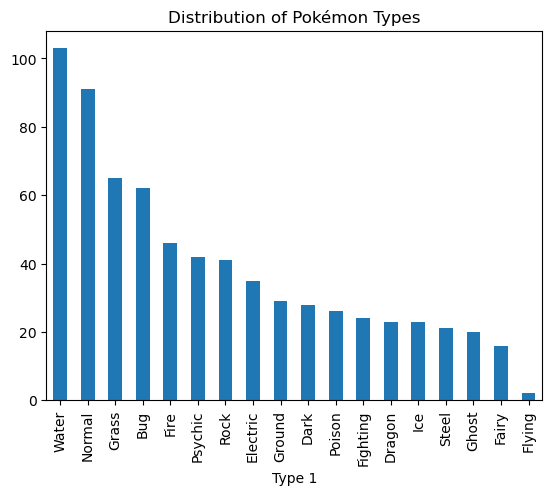

In [10]:
# This code will count the number of pokémon ordered by the first type from more to less
df_pokemon['Type 1'].value_counts().plot(kind='bar', title='Distribution of Pokémon Types')

<Axes: title={'center': 'Distribution of Secondary Pokémon Types'}, xlabel='Type 2'>

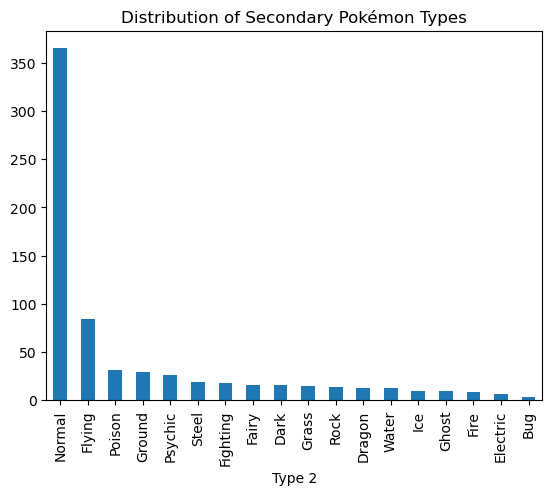

In [11]:
# Same logic than prior code, only the order is based on the second type
df_pokemon['Type 2'].value_counts().plot(kind='bar', title='Distribution of Secondary Pokémon Types')

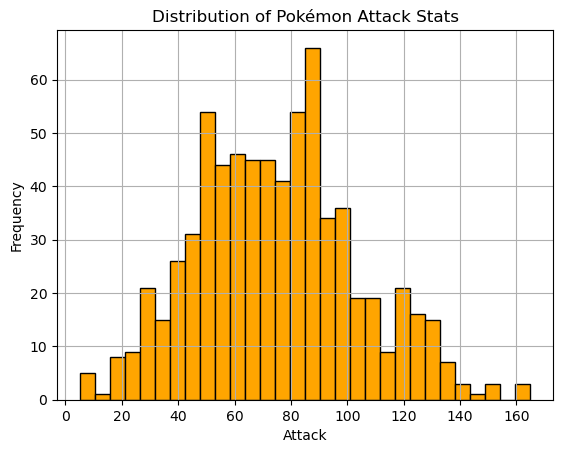

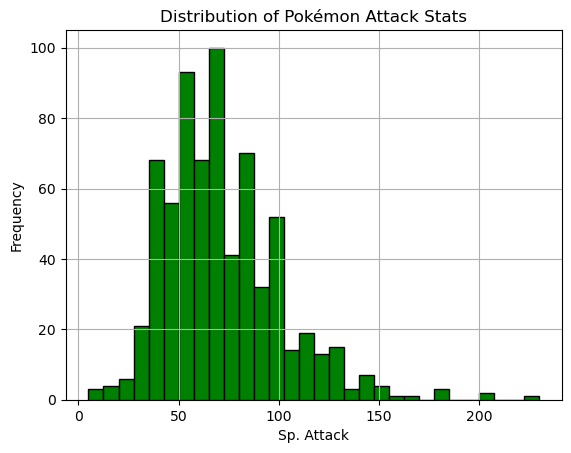

In [12]:
# This code visualize the distribution of different stats (Attack, Defense, etc...) with the amount of pokemons with the same value
# We can check the distribution of the Attack Stat
df_pokemon['Attack'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Pokémon Attack Stats')
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.show()

# Let´s check now the Defense stat
df_pokemon['Defense'].hist(bins=30, color='green', edgecolor='black')
plt.title('Distribution of Pokémon Attack Stats')
plt.xlabel('Sp. Attack')
plt.ylabel('Frequency')
plt.show()

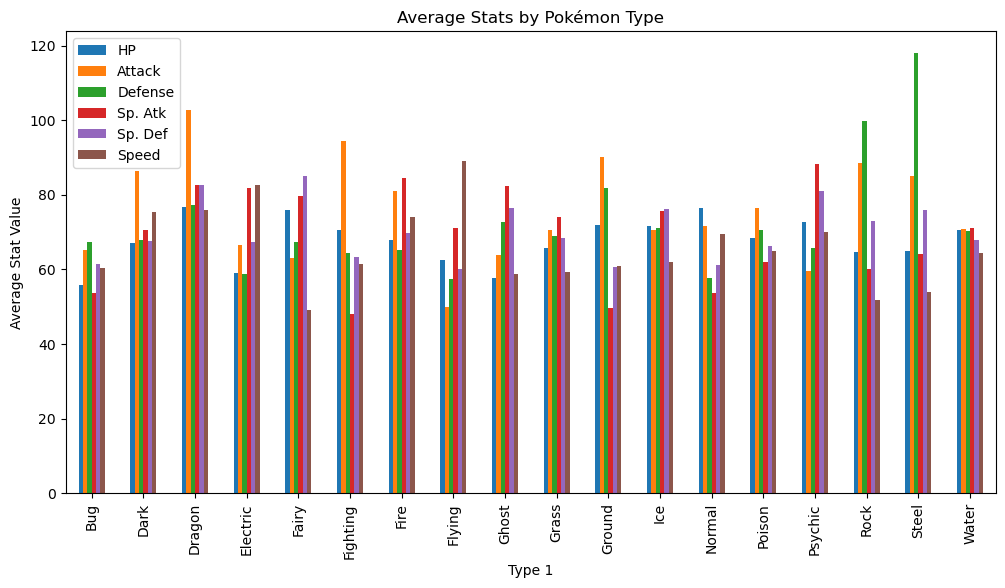

In [13]:
# With this code we can compare the average stats among the different types of pokémon
type_stats = df_pokemon.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
type_stats.plot(kind='bar', figsize=(12, 6), title='Average Stats by Pokémon Type')
plt.ylabel('Average Stat Value')
plt.show()

In [14]:
# Now, we will split the dataset into two different data frames (Legendary and Non-Legendary)
legendary_df = df_pokemon[df_pokemon['Legendary'] == True]
non_legendary_df = df_pokemon[df_pokemon['Legendary'] == False]

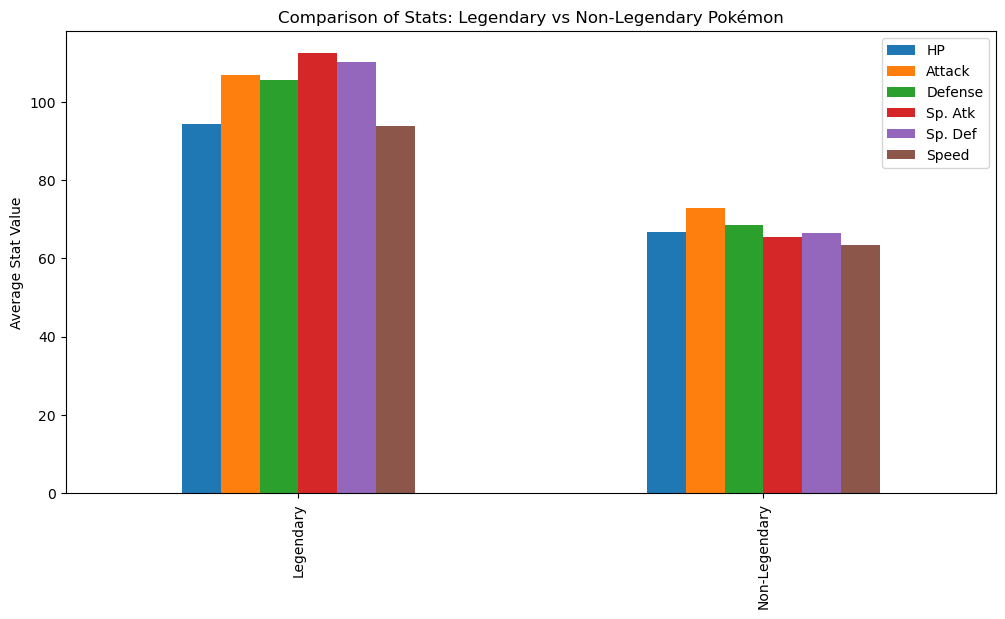

In [15]:
# Before comparing we need to obtain the average value of each stat for both Legendary and Non-Legendary
legendary_mean = legendary_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
non_legendary_mean = non_legendary_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

# Create a comparison DataFrame
comparison_df = pd.DataFrame([legendary_mean, non_legendary_mean], index=['Legendary', 'Non-Legendary'])
comparison_df.plot(kind='bar', figsize=(12, 6), title='Comparison of Stats: Legendary vs Non-Legendary Pokémon')
plt.ylabel('Average Stat Value')
plt.show()

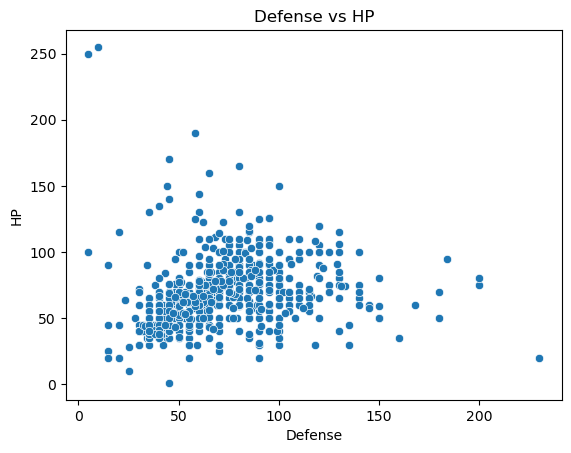

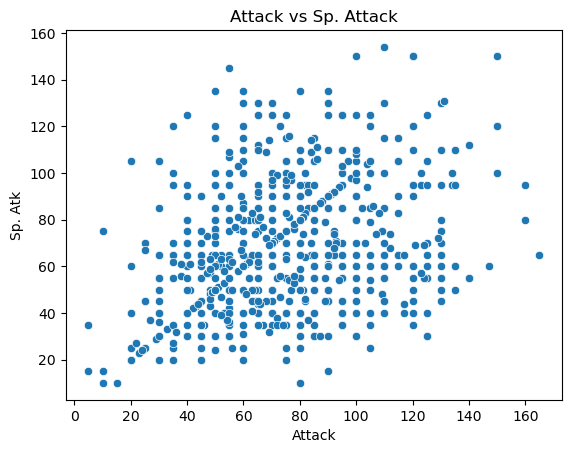

In [16]:
# We can also plot the relationship between two different stats by using simple scatter plots
# Let´s plot Defense and HP
sns.scatterplot(data=df_pokemon, x='Defense', y='HP')
plt.title('Defense vs HP')
plt.show()

# Now, let´s check the correlation between Attack and Sp. Attack
sns.scatterplot(data=df_pokemon, x='Attack', y='Sp. Atk')
plt.title('Attack vs Sp. Attack')
plt.show()

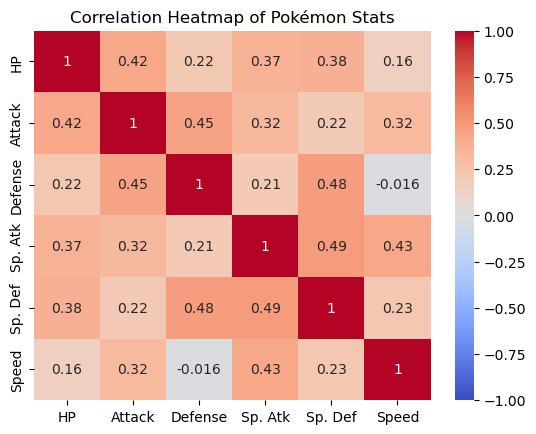

In [17]:
# If we want to check the correlation between all the stats, the best option is to create a correlation matrix
correlation_matrix = df_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

After checking the correlation matrix, we can conclude that the 2 stats more correlated are Special Attack and Special Defense. This makes sense since in the first generation this two stats were unified in only one called Special. 

# 2nd phase. 
### Building a prediction model using Machine Learning.

In [20]:
# First step, load battle data into the dataframe
df_battles = pd.read_csv(r'C:\Users\Edo\Documents\data_science-portfolio\Project1\data\Simulated_Pokemon_Battles.csv') # To load the data, change the path to correspond the file path in your device
df_battles['Target'] = (df_battles['winner'] == df_battles['pokemon_1']).astype(int)
# Display the first few rows of the data
df_battles.head()

pokemon_1  pokemon_2  type_eff_1_to_2  type_eff_2_to_1  stat_sum_1  \
0        xatu  heracross              8.0             0.25         470   
1  whirlipede     skiddo              4.0             0.50         360   
2      skitty  palpitoad              1.0             1.00         260   
3     koffing   zangoose              1.0             1.00         340   
4    beheeyem    sliggoo              1.0             1.00         485   

   stat_sum_2  score_1  score_2      winner  Target  
0         500   3760.0    125.0        xatu       1  
1         350   1440.0    175.0  whirlipede       1  
2         384    260.0    384.0   palpitoad       0  
3         458    340.0    458.0    zangoose       0  
4         452    485.0    452.0    beheeyem       1

In [21]:
# Now, we have to include all the type effectivenes in order to create a more accurate model of prediction order by Attacker to Defender
type_effectiveness = {
    'Normal': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 2, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 1, 'Rock': 1, 'Ghost': 0, 'Dragon': 1, 'Dark': 1, 'Steel': 1, 'Fairy': 1},
    'Fire': {'Normal': 1, 'Fire': 1, 'Water': 0.5, 'Electric': 1, 'Grass': 2, 'Ice': 2, 'Fighting': 1, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 2, 'Rock': 0.5, 'Ghost': 1, 'Dragon': 1, 'Dark': 1, 'Steel': 2, 'Fairy': 1},
    'Water': {'Normal': 1, 'Fire': 2, 'Water': 1, 'Electric': 0.5, 'Grass': 0.5, 'Ice': 2, 'Fighting': 1, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 1, 'Rock': 2, 'Ghost': 1, 'Dragon': 0.5, 'Dark': 1, 'Steel': 1, 'Fairy': 1},
    'Electric': {'Normal': 1, 'Fire': 1, 'Water': 2, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 1, 'Poison': 1, 'Ground': 0, 'Flying': 2, 'Psychic': 1, 'Bug': 1, 'Rock': 1, 'Ghost': 1, 'Dragon': 0.5, 'Dark': 1, 'Steel': 1, 'Fairy': 1},
    'Grass': {'Normal': 1, 'Fire': 0.5, 'Water': 2, 'Electric': 1, 'Grass': 1, 'Ice': 0.5, 'Fighting': 1, 'Poison': 0.5, 'Ground': 2, 'Flying': 0.5, 'Psychic': 1, 'Bug': 0.5, 'Rock': 2, 'Ghost': 1, 'Dragon': 1, 'Dark': 1, 'Steel': 0.5, 'Fairy': 1},
    'Ice': {'Normal': 1, 'Fire': 0.5, 'Water': 0.5, 'Electric': 1, 'Grass': 2, 'Ice': 1, 'Fighting': 2, 'Poison': 1, 'Ground': 2, 'Flying': 1, 'Psychic': 1, 'Bug': 1, 'Rock': 2, 'Ghost': 1, 'Dragon': 2, 'Dark': 1, 'Steel': 0.5, 'Fairy': 1},
    'Fighting': {'Normal': 2, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 2, 'Fighting': 1, 'Poison': 1, 'Ground': 1, 'Flying': 0.5, 'Psychic': 0.5, 'Bug': 1, 'Rock': 2, 'Ghost': 0, 'Dragon': 1, 'Dark': 2, 'Steel': 2, 'Fairy': 0.5},
    'Poison': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 2, 'Ice': 1, 'Fighting': 1, 'Poison': 1, 'Ground': 0.5, 'Flying': 1, 'Psychic': 2, 'Bug': 2, 'Rock': 1, 'Ghost': 0.5, 'Dragon': 1, 'Dark': 1, 'Steel': 0, 'Fairy': 2},
    'Ground': {'Normal': 1, 'Fire': 2, 'Water': 1, 'Electric': 2, 'Grass': 0.5, 'Ice': 1, 'Fighting': 1, 'Poison': 2, 'Ground': 1, 'Flying': 0, 'Psychic': 1, 'Bug': 1, 'Rock': 2, 'Ghost': 1, 'Dragon': 1, 'Dark': 1, 'Steel': 2, 'Fairy': 1},
    'Flying': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 0.5, 'Grass': 2, 'Ice': 1, 'Fighting': 2, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 2, 'Rock': 0.5, 'Ghost': 1, 'Dragon': 1, 'Dark': 1, 'Steel': 1, 'Fairy': 1},
    'Psychic': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 2, 'Poison': 2, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 1, 'Rock': 1, 'Ghost': 1, 'Dragon': 1, 'Dark': 0, 'Steel': 1, 'Fairy': 1},
    'Bug': {'Normal': 1, 'Fire': 0.5, 'Water': 1, 'Electric': 1, 'Grass': 2, 'Ice': 1, 'Fighting': 1, 'Poison': 1, 'Ground': 1, 'Flying': 0.5, 'Psychic': 2, 'Bug': 1, 'Rock': 2, 'Ghost': 1, 'Dragon': 1, 'Dark': 2, 'Steel': 0.5, 'Fairy': 0.5},
    'Rock': {'Normal': 1, 'Fire': 2, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 2, 'Fighting': 0.5, 'Poison': 1, 'Ground': 1, 'Flying': 2, 'Psychic': 1, 'Bug': 2, 'Rock': 1, 'Ghost': 1, 'Dragon': 1, 'Dark': 1, 'Steel': 0.5, 'Fairy': 1},
    'Ghost': {'Normal': 0, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 0, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 2, 'Bug': 1, 'Rock': 1, 'Ghost': 2, 'Dragon': 1, 'Dark': 2, 'Steel': 1, 'Fairy': 1},
    'Dragon': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 1, 'Poison': 1, 'Ground': 1, 'Flying': 2, 'Psychic': 1, 'Bug': 1, 'Rock': 1, 'Ghost': 1, 'Dragon': 2, 'Dark': 1, 'Steel': 0.5, 'Fairy': 0},
    'Dark': {'Normal': 1, 'Fire': 1, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 0.5, 'Poison': 1, 'Ground': 1, 'Flying': 1, 'Psychic': 2, 'Bug': 1, 'Rock': 1, 'Ghost': 2, 'Dragon': 1, 'Dark': 1, 'Steel': 1, 'Fairy': 0.5},
    'Steel': {'Normal': 1, 'Fire': 0.5, 'Water': 0.5, 'Electric': 0.5, 'Grass': 1, 'Ice': 2, 'Fighting': 2, 'Poison': 1, 'Ground': 2, 'Flying': 1, 'Psychic': 1, 'Bug': 2, 'Rock': 2, 'Ghost': 1, 'Dragon': 2, 'Dark': 1, 'Steel': 1, 'Fairy': 2},
    'Fairy': {'Normal': 1, 'Fire': 0.5, 'Water': 1, 'Electric': 1, 'Grass': 1, 'Ice': 1, 'Fighting': 2, 'Poison': 2, 'Ground': 1, 'Flying': 1, 'Psychic': 1, 'Bug': 1, 'Rock': 1, 'Ghost': 1, 'Dragon': 2, 'Dark': 2, 'Steel': 0.5, 'Fairy': 1}
}

In [22]:
# the next step is to separate the features from the target and split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
X = df_battles[['stat_sum_1', 'stat_sum_2', 'type_eff_1_to_2', 'type_eff_2_to_1']]
y = df_battles['Target']  # Target variable (attacker wins)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [23]:
# Now, let's train a machine learning model using different models in order to find the most accurate
# Let's start with the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# First, we initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=9)

# Then, we train the model on the training data
model.fit(X_train, y_train)

# And finally, we evaluate the model on the test set
rf_accuracy = model.score(X_test, y_test)
print(f'Random Forest Classifier Accuracy: {rf_accuracy}')

Random Forest Classifier Accuracy: 0.9975


In [24]:
# Now, let's try Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=9)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_accuracy = (y_pred_log_reg == y_test).mean()
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')

Logistic Regression Accuracy: 0.961625


In [25]:
# Let's also try the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=9)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = (y_pred_dt == y_test).mean()
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.99675


In [26]:
# Lastly, let's also try the Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc_model = SVC(random_state=9)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = (y_pred_svc == y_test).mean()
print(f'Support Vector Classifier Accuracy: {svc_accuracy}')

Support Vector Classifier Accuracy: 0.701625


In [27]:
# Finally, we'll compare them in order to find the model with the highest accuracy
models = {
    'Random Forest': rf_accuracy,
    'SVC': svc_accuracy,
    'Decision Tree': dt_accuracy,
    'Logistic Regression': log_reg_accuracy
}

# Print the model with the best accuracy
best_model_name = max(models, key=models.get)
print(f'Best Model: {best_model_name} with Accuracy: {models[best_model_name]}')

Best Model: Random Forest with Accuracy: 0.9975


## At this stage, we need to re-train the model on all the data before deploying it 

In [29]:
# Re-train the Random Forest model on the full dataset (train and test combined)
final_rf_model = RandomForestClassifier(random_state=9)
final_rf_model.fit(X, y)  # Using the entire dataset (X and y)

RandomForestClassifier(random_state=9)

## After re-training the model on the full dataset, we should save it so we can use it later on without undergoing the whole training process again.

In [57]:
import pickle

# Let's serialize (save) our model using pickle
with open('pokemon_model.pkl', 'wb') as file:
    pickle.dump(final_rf_model, file)

# Also, we should save our pokemon dataset as a CSV. This will be helpful on later steps
df_pokemon.to_csv('pokemon_data.csv', index=False)